In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
from dqn import Options,DQN,DuelingDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## DQN - Cartpole

In [2]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnCartPole = DQN(
    envInfo=EnvInfo(env=gym.make('CartPole-v1')),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=600
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='CartPole_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

# dqnCartPole.train()

## Saving Results of DQN Cartpole

In [3]:
# dqnCartPole.saveWeights()
# dqnCartPole.saveModels()
# dqnCartPole.saveResults()

## DQN Grid Environment

In [4]:
class NeuralNetworkForGridEnv(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

gridEnv = GridEnvironment(env="Deterministic", max_timesteps=100)
    
dqnGridEnv = DQN(
    envInfo=EnvInfo(
        env=gridEnv,
        observation_space = gridEnv.observation_space.n,
        action_space = gridEnv.action_space.n
    ),
    hyperparams=Hyperparams(
        epsilon=0.9,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=1000,
        learningRate=0.001,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=300
    ),
    nnModel=NeuralNetworkForGridEnv,
    options = Options(
        resultsPath='./results',
        filePrefix='GridEnv_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

# dqnGridEnv.train()

## Saving DQN Grid Environment

In [5]:
# dqnGridEnv.saveWeights()
# dqnGridEnv.saveModels()
# dqnGridEnv.saveResults()

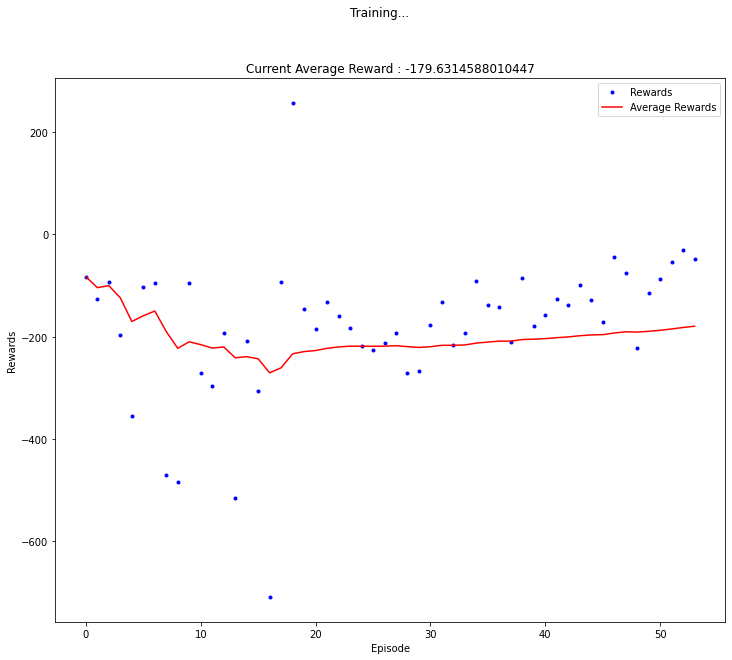

In [ ]:
class NeuralNetworkForLunarLander(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnLunarLander = DQN(
    envInfo=EnvInfo(env=gym.make(
        "LunarLander-v2",
        continuous = False,
        gravity = -10.0,
        enable_wind = False,
        wind_power = 15.0,
        turbulence_power = 1.5
    )),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=10000,
        learningRate=3e-4,
        batchSize=32,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=300,
        episodes=1000
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='LunarLander_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnLunarLander.train()

In [ ]:
# dqnLunarLander.saveModels()
# dqnLunarLander.saveWeights()
# dqnLunarLander.saveResults()